In [1]:
import qiskit 
from qiskit import *
from qiskit.tools.visualization import plot_bloch_multivector
import numpy as np
from qiskit.tools.visualization import plot_histogram

In [2]:
State_simulator=Aer.get_backend(name="statevector_simulator")
Measure_simulator=Aer.get_backend(name="qasm_simulator")
Unitary_simulator=Aer.get_backend(name="unitary_simulator")

# X gate

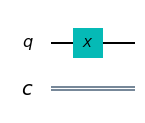

In [3]:
circuit= QuantumCircuit(1,1)
circuit.x(0)
State_result = execute(circuit, backend=State_simulator).result()
circuit.draw(output="mpl")

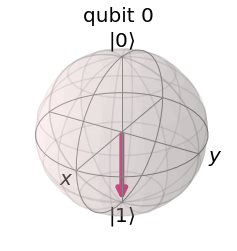

In [4]:
statevector=State_result.get_statevector()
plot_bloch_multivector(statevector)

In [5]:
Unitary_result = execute(circuit, backend=Unitary_simulator).result()
unitary_x= Unitary_result.get_unitary()
print(unitary_x)

[[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]


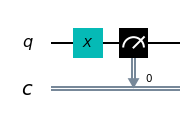

In [6]:
circuit.measure(0,0)
circuit.draw(output="mpl")

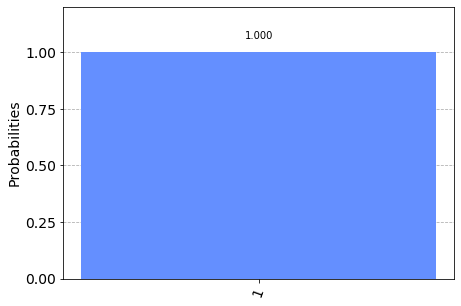

In [7]:
Measure_result=execute(circuit, backend=Measure_simulator,shots=1024).result()
Measure_counts=Measure_result.get_counts()
plot_histogram(Measure_counts)

# H gate

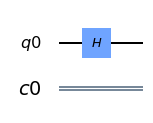

In [8]:
qr=QuantumRegister(1)
cr=ClassicalRegister(1)
circ=QuantumCircuit(qr,cr)
circ.h(0)
circ.draw(output="mpl")

In [9]:
State_result=execute(circ,backend=State_simulator).result()
Unitary_result=execute(circ,backend=Unitary_simulator).result()

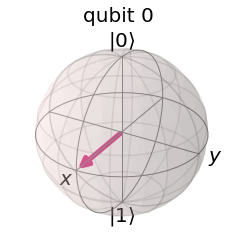

In [10]:
statevector=State_result.get_statevector()
plot_bloch_multivector(statevector)

In [11]:
unitary_h=Unitary_result.get_unitary()
print(unitary_h)

[[ 0.70710678+0.00000000e+00j  0.70710678-8.65956056e-17j]
 [ 0.70710678+0.00000000e+00j -0.70710678+8.65956056e-17j]]


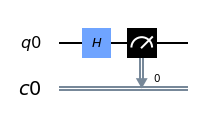

In [12]:
circ.measure(0,0)
circ.draw(output="mpl")

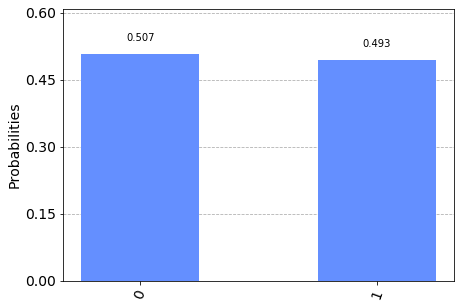

In [13]:
Measure_result=execute(circ, backend=Measure_simulator,shots=1024).result()
Measure_counts=Measure_result.get_counts()
plot_histogram(Measure_counts)

# Gate Y

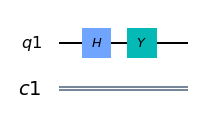

In [14]:
qr=QuantumRegister(1)
cr=ClassicalRegister(1)
circuit=QuantumCircuit(qr,cr)
circuit.h(0)
circuit.y(0)
circuit.draw(output="mpl")

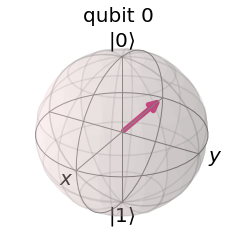

In [15]:
State_result=execute(circuit,backend=State_simulator).result()
Unitary_result=execute(circuit,backend=Unitary_simulator).result()
statevector=State_result.get_statevector()
plot_bloch_multivector(statevector)

In [16]:
print(statevector)
unitary_y=Unitary_result.get_unitary()
print(unitary_y)

[0.-0.70710678j 0.+0.70710678j]
[[0.00000000e+00-0.70710678j 8.65956056e-17+0.70710678j]
 [0.00000000e+00+0.70710678j 8.65956056e-17+0.70710678j]]


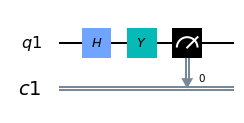

In [17]:
circuit.measure(0,0)
circuit.draw(output="mpl")

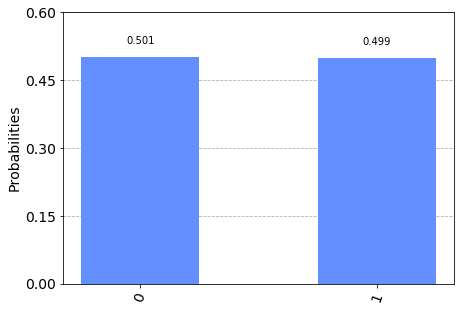

In [18]:
Measure_result=execute(circuit, backend=Measure_simulator,shots=1024).result()
Measure_counts=Measure_result.get_counts()
plot_histogram(Measure_counts)

# Gate Z

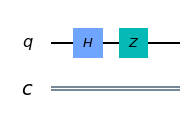

In [19]:
circuit = QuantumCircuit(1,1)
circuit.h(0)
circuit.z(0)
circuit.draw(output="mpl")

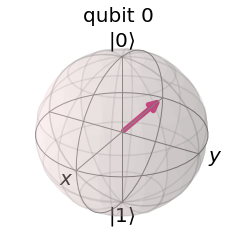

In [20]:
State_result=execute(circuit,backend=State_simulator).result()
Unitary_ruitesult=execute(circuit,backend=Unitary_simulator).result()
statevector=State_result.get_statevector()
plot_bloch_multivector(statevector)

In [21]:
print(statevector)
unitary_y=Unitary_result.get_unitary()
print(unitary_y)

[ 0.70710678+0.j -0.70710678+0.j]
[[0.00000000e+00-0.70710678j 8.65956056e-17+0.70710678j]
 [0.00000000e+00+0.70710678j 8.65956056e-17+0.70710678j]]


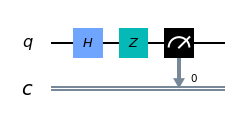

In [22]:
circuit.measure(0,0)
circuit.draw(output="mpl")

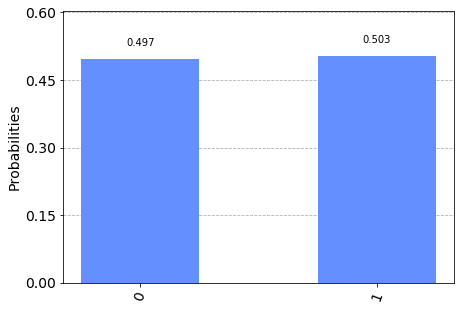

In [23]:
Measure_result=execute(circuit, backend=Measure_simulator,shots=1024).result()
Measure_counts=Measure_result.get_counts()
plot_histogram(Measure_counts)

# Single Qubit Terrain Generation

In [24]:
import matplotlib
import math
from math import pi, sqrt
import random 
from random import randint
import matplotlib.pyplot as plt
from matplotlib import cm

In [25]:
map_size=10
#Create a function to define the altitude of each x,y point
def alt(x,y):
    qr=QuantumRegister(1)
    cr=ClassicalRegister(1)
    qc= QuantumCircuit(qr,cr)
    qc.x(qr[0])
    qc.rx((1/24)*x*pi,0)
    qc.ry((1/24)*y*pi,0)
    
    qc.measure(0,0)
    
    # determine the probability of a 1
    try:
        p = execute(qc,Aer.get_backend('qasm_simulator'),shots=8192).result().get_counts()['1']/1000
    except:
        p = 0
             
    # return p^2 as the height
    return p**2

In [26]:
z = [ [alt(x,y) for x in range(-map_size,map_size)] for y in range(-map_size,map_size) ]

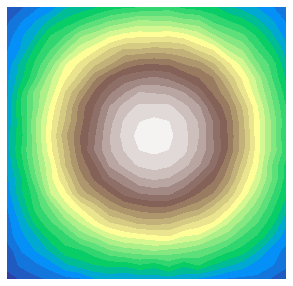

In [27]:
def plot_z(z,L):
    
    fig, ax = plt.subplots()
    fig.set_size_inches(L/2,L/2)
    cs = ax.contourf(z,25,cmap=cm.get_cmap('terrain'))
    plt.axis('off')
    plt.show()
    
plot_z(z,map_size)

In [28]:
#Lets generate a more random map
def alt(x,y):
    qr=QuantumRegister(1)
    cr=ClassicalRegister(1)
    qc= QuantumCircuit(qr,cr)
    s=randint(0,3)
    qc.x(qr[0])
    qc.rx((1/8)*x*pi,0)
    qc.ry((1/8)*y*pi,0)
    if(abs(x)>4 or abs(y)>4):
        r=randint(0,2)
        i=0
        while i<r:
            qc.rx((i/16)*x*pi,0)
            qc.ry((i/16)*y*pi,0)
            qc.h(0)
            i+=1
    
    
    qc.measure(0,0)
    
    # determine the probability of a 1
    try:
        p = execute(qc,Aer.get_backend('qasm_simulator'),shots=8192).result().get_counts()['1']/1000
    except:
        p = 0
             
    # return p^2 as the height
    return p**2

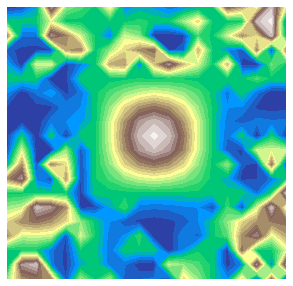

In [29]:
z = [ [alt(x,y) for x in range(-map_size,map_size)] for y in range(-map_size,map_size) ]    
plot_z(z,map_size)